# INITIALIZATION

In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
!pip install tensorflow numpy pandas scikit-learn

In [25]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
import sklearn.metrics as metrics
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam


import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud


# DATA COLLECTION

In [4]:
df = pd.read_csv('news.csv')
df = df.drop(['Unnamed: 0'], axis=1)

df.rename(columns = {'label':'label1'}, inplace = True)
df['label'] = np.where(df['label1'] == 'FAKE', 0, 1)
df = df.drop(['label1'], axis=1)
print(df.shape)
df.head()

(6335, 3)


,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


In [5]:
true_df = pd.read_csv('True.csv')
true_df = true_df.drop(['subject'], axis=1)
true_df = true_df.drop(['date'], axis=1)
true_df['label'] = 1
# rows_to_drop = np.random.choice(true_df.index, 500, replace=False)
# true_df = true_df.drop(rows_to_drop)
print(true_df.shape)
true_df.head()

(21417, 3)


,title,text,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


In [6]:
fake_df = pd.read_csv('Fake.csv')
fake_df = fake_df.drop(['subject'], axis=1)
fake_df = fake_df.drop(['date'], axis=1)
fake_df['label'] = 0
print(fake_df.shape)
fake_df.head()

(23481, 3)


,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0


In [7]:
final_df = pd.concat([true_df, fake_df, df])
final_df = final_df.sample(frac = 1)
print(final_df.shape)
final_df.head()

(51233, 3)


,title,text,label
19316,LEFTIST FREAKS OPENLY CALL For Non-Peaceful In...,,0
5536,Two Cops In Hot Water After Sending Snapchat ...,It looks as though two police officers in Memp...,0
690,"Trump praises 'productive' China talks, but to...",BEIJING (Reuters) - U.S. President Donald Trum...,1
22084,Boiler Room EP #114 – Psychos In The Compromis...,Tune in to the Alternate Current Radio Network...,0
3587,Obama delivers emotional eulogy for Beau Biden,"Wilmington, Delaware (CNN) President Barack Ob...",1


In [8]:
final_df = final_df.reset_index(drop=True)
data = final_df

# DATA VISUALIZATION

<Axes: xlabel='label', ylabel='count'>

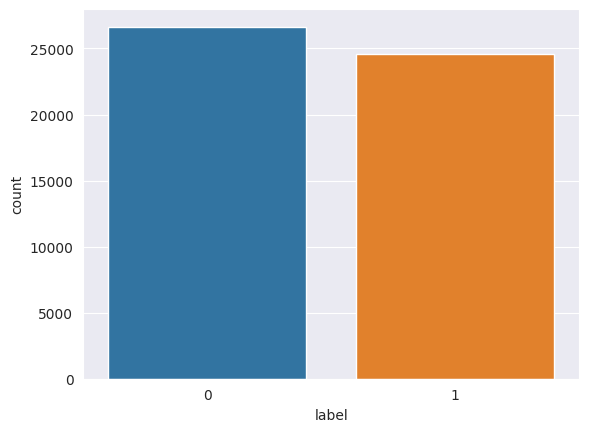

In [9]:
sns.set_style("darkgrid")
sns.countplot(x='label', data=data)

In [10]:
data.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [ ]:
data['text'] = data['title'] + " " + data['text']
data = data.drop(['title'], axis=1)

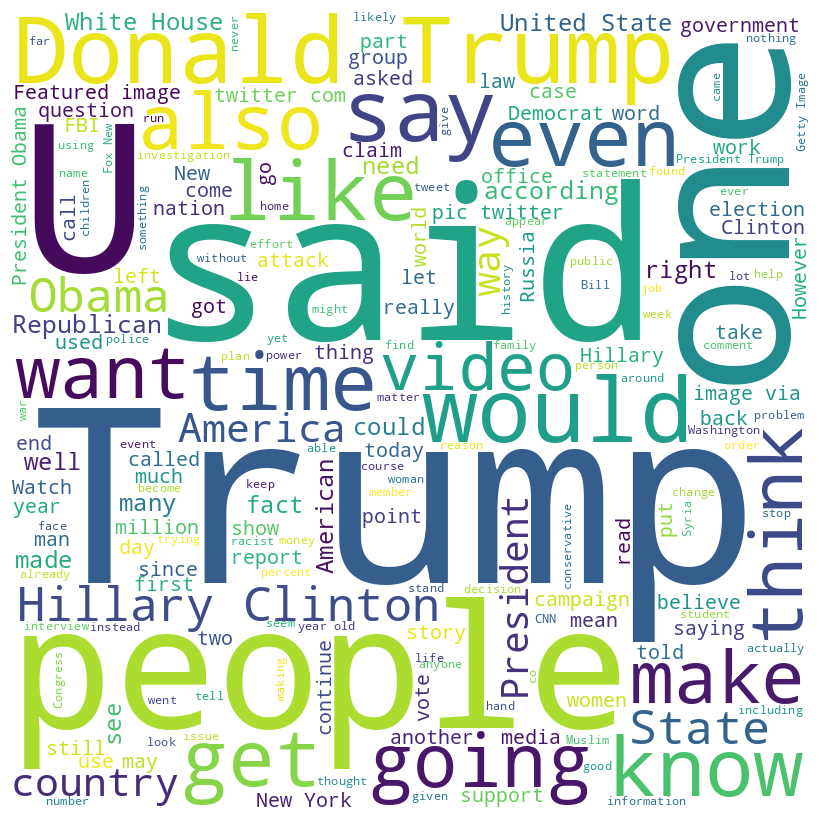

In [22]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords.words('english'),
                min_font_size = 10).generate(" ".join(data[data['label'] == 0].text))

# plot the word cloud for fake news data
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

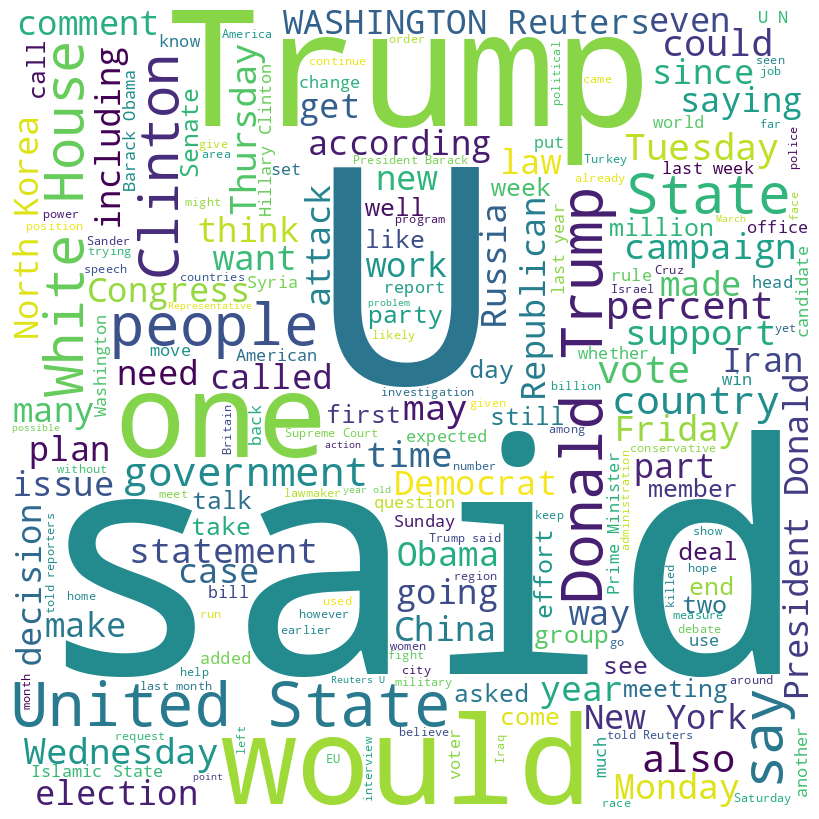

In [23]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords.words('english'),
                min_font_size = 10).generate(" ".join(data[data['label'] == 1].text))

# plot the WordCloud image for genuine news data
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# Classification


In [18]:
x_train, x_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=1)

accuracy:   90.670


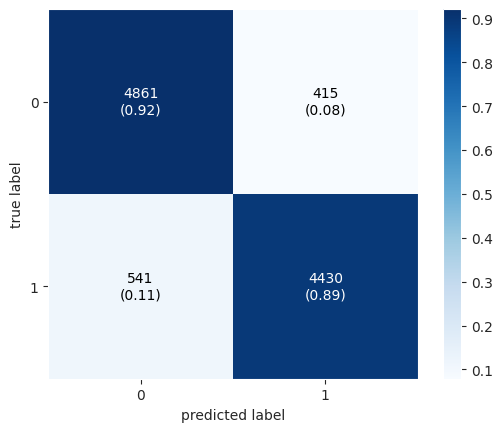

In [19]:
#Multinomial NB
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

score = metrics.accuracy_score(y_test, prediction)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

accuracy:   98.048


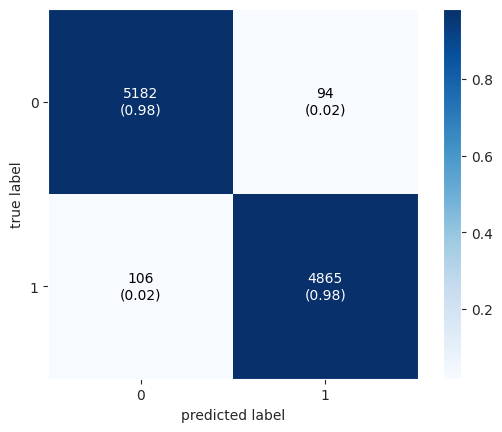

In [20]:
# SVM

pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC())
])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

score = metrics.accuracy_score(y_test, prediction)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

accuracy:   97.775


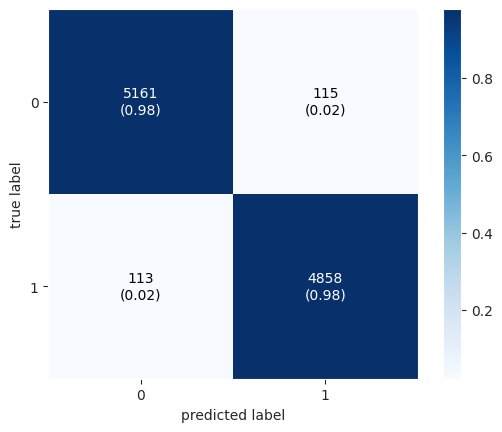

In [21]:
#Passive Aggressive Classifier
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf',  PassiveAggressiveClassifier())
])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

score = metrics.accuracy_score(y_test, prediction)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

## Using Existing Architectures

In [31]:
# Preprocessing the data
max_words = 1000  # Considering only the top 1000 words in the dataset
max_len = 100  # Maximum length of each sequence

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])
X = pad_sequences(sequences, maxlen=max_len)
y = data['label']

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Epoch 1/5
1281/1281 [==============================] - 29s 22ms/step - loss: 0.4282 - accuracy: 0.8113 - val_loss: 0.2308 - val_accuracy: 0.9075
Epoch 2/5
1281/1281 [==============================] - 29s 23ms/step - loss: 0.1895 - accuracy: 0.9257 - val_loss: 0.1836 - val_accuracy: 0.9255
Epoch 3/5
1281/1281 [==============================] - 29s 22ms/step - loss: 0.1595 - accuracy: 0.9375 - val_loss: 0.1702 - val_accuracy: 0.9329
Epoch 4/5
1281/1281 [==============================] - 35s 27ms/step - loss: 0.1440 - accuracy: 0.9446 - val_loss: 0.1632 - val_accuracy: 0.9341
Epoch 5/5
321/321 [==============================] - 2s 6ms/step


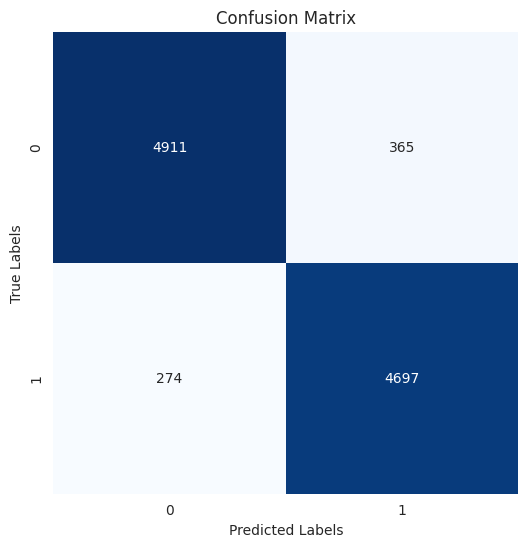

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      5276
           1       0.93      0.94      0.94      4971

    accuracy                           0.94     10247
   macro avg       0.94      0.94      0.94     10247
weighted avg       0.94      0.94      0.94     10247



In [32]:
# CNN
model = Sequential()
model.add(Embedding(max_words, 50, input_length=max_len))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))
y_pred = model.predict(x_test)
y_pred_classes = np.round(y_pred)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
class_report = classification_report(y_test, y_pred_classes)
print(class_report)

Epoch 1/5
1281/1281 [==============================] - 76s 57ms/step - loss: 0.3336 - accuracy: 0.8724 - val_loss: 0.2096 - val_accuracy: 0.9285
Epoch 2/5
1281/1281 [==============================] - 70s 55ms/step - loss: 0.1736 - accuracy: 0.9378 - val_loss: 0.1729 - val_accuracy: 0.9373
Epoch 3/5
1281/1281 [==============================] - 69s 54ms/step - loss: 0.1467 - accuracy: 0.9461 - val_loss: 0.1615 - val_accuracy: 0.9379
Epoch 4/5
1281/1281 [==============================] - 71s 55ms/step - loss: 0.1328 - accuracy: 0.9505 - val_loss: 0.1482 - val_accuracy: 0.9447
Epoch 5/5
321/321 [==============================] - 4s 12ms/step


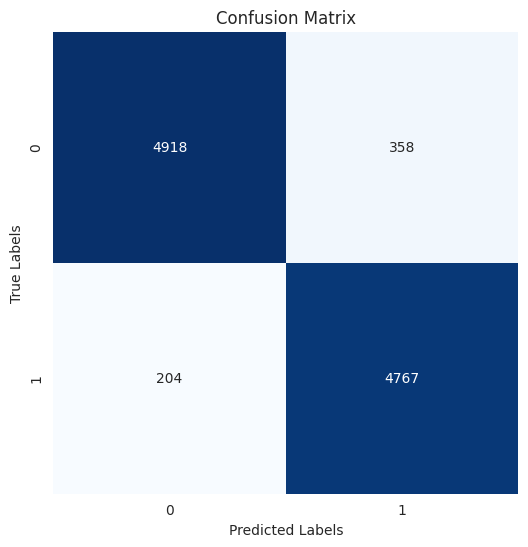

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      5276
           1       0.93      0.96      0.94      4971

    accuracy                           0.95     10247
   macro avg       0.95      0.95      0.95     10247
weighted avg       0.95      0.95      0.95     10247



In [33]:
# LSTM

model = Sequential()
model.add(Embedding(max_words, 50, input_length=max_len))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))
y_pred = model.predict(x_test)
y_pred_classes = np.round(y_pred)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
class_report = classification_report(y_test, y_pred_classes)
print(class_report)

Epoch 1/10
1281/1281 [==============================] - 38s 28ms/step - loss: 0.3923 - accuracy: 0.8341 - val_loss: 0.2557 - val_accuracy: 0.9096
Epoch 2/10
1281/1281 [==============================] - 36s 28ms/step - loss: 0.2065 - accuracy: 0.9268 - val_loss: 0.1842 - val_accuracy: 0.9347
Epoch 3/10
1281/1281 [==============================] - 34s 27ms/step - loss: 0.1567 - accuracy: 0.9458 - val_loss: 0.1617 - val_accuracy: 0.9434
Epoch 4/10
1281/1281 [==============================] - 34s 27ms/step - loss: 0.1322 - accuracy: 0.9550 - val_loss: 0.1744 - val_accuracy: 0.9337
Epoch 5/10
1281/1281 [==============================] - 36s 28ms/step - loss: 0.1188 - accuracy: 0.9577 - val_loss: 0.1597 - val_accuracy: 0.9403
Epoch 6/10
1281/1281 [==============================] - 36s 28ms/step - loss: 0.1084 - accuracy: 0.9621 - val_loss: 0.1461 - val_accuracy: 0.9460
Epoch 7/10
1281/1281 [==============================] - 34s 27ms/step - loss: 0.0995 - accuracy: 0.9661 - val_loss: 0.1431 -

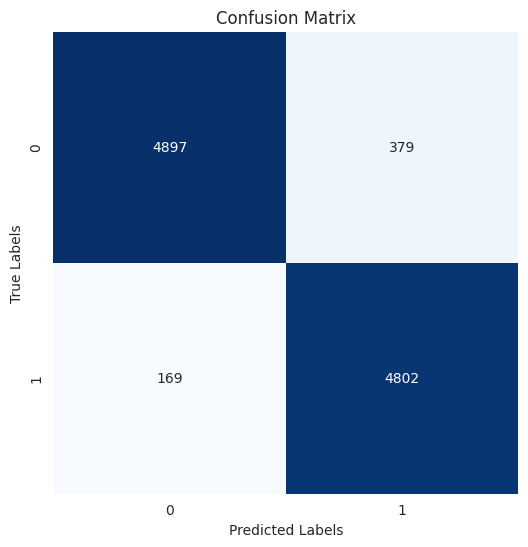

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      5276
           1       0.93      0.97      0.95      4971

    accuracy                           0.95     10247
   macro avg       0.95      0.95      0.95     10247
weighted avg       0.95      0.95      0.95     10247



In [34]:
# RNN
model = Sequential()
model.add(Embedding(max_words, 50, input_length=max_len))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))
y_pred = model.predict(x_test)
y_pred_classes = np.round(y_pred)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
class_report = classification_report(y_test, y_pred_classes)
print(class_report)